<a href="https://colab.research.google.com/github/nfauzi99/tugaspythondaun/blob/main/mohamad_naufal_fauzi-1101208152-ttx44-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
ls

daun/    Untitled0.ipynb  Untitled2.ipynb  Untitled4.ipynb
python/  Untitled1.ipynb  Untitled3.ipynb  Untitled5.ipynb


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [4]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [5]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32X32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11', 'GMB_11',

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [9]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(448, 32, 32, 3)
(150, 32, 32, 3)


In [10]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [11]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [12]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=38, batch_size=42)

Epoch 1/38
11/11 [==============================] - 1s 68ms/step - loss: 1.6002 - accuracy: 0.2321 - val_loss: 1.5835 - val_accuracy: 0.1933
Epoch 2/38
11/11 [==============================] - 1s 52ms/step - loss: 1.5287 - accuracy: 0.3013 - val_loss: 1.5258 - val_accuracy: 0.2533
Epoch 3/38
11/11 [==============================] - 1s 53ms/step - loss: 1.4143 - accuracy: 0.3862 - val_loss: 1.3797 - val_accuracy: 0.4000
Epoch 4/38
11/11 [==============================] - 1s 55ms/step - loss: 1.2944 - accuracy: 0.4487 - val_loss: 1.2336 - val_accuracy: 0.4467
Epoch 5/38
11/11 [==============================] - 1s 53ms/step - loss: 1.1716 - accuracy: 0.4955 - val_loss: 1.2074 - val_accuracy: 0.5533
Epoch 6/38
11/11 [==============================] - 1s 54ms/step - loss: 1.0876 - accuracy: 0.5335 - val_loss: 1.1159 - val_accuracy: 0.5533
Epoch 7/38
11/11 [==============================] - 1s 54ms/step - loss: 1.0166 - accuracy: 0.5625 - val_loss: 0.9917 - val_accuracy: 0.5533
Epoch 8/38
11

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


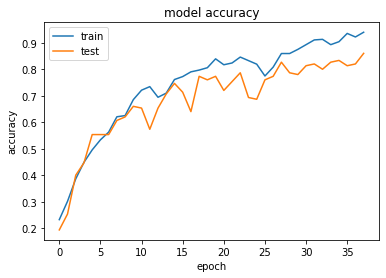

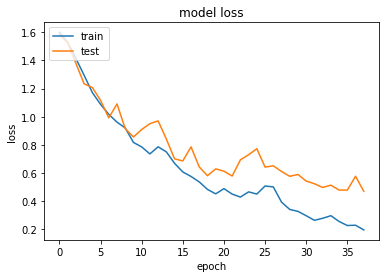

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=42)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_03       1.00      0.93      0.96        28
      GMB_05       0.92      0.71      0.80        34
      GMB_07       0.79      0.87      0.83        30
      GMB_09       0.78      1.00      0.88        18
      GMB_11       0.83      0.88      0.85        40

    accuracy                           0.86       150
   macro avg       0.87      0.88      0.86       150
weighted avg       0.87      0.86      0.86       150

